In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('sharebike.csv')

### 查看数据详情

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# 大致含有2年左右的数据，以每天记24次算，大概453天，一年+3个月左右，可见时间并不连续
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012/12/19 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012/12/19 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012/12/19 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012/12/19 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012/12/19 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


### 字段说明

In [5]:
# 时间情况：日期+时间；季节1-4；是否节假日；是否工作日；
# 天气情况：天气 1晴天，2阴天，3小雨雪，4大雨雪；温度；体感温度；湿度；风速；
# 使用情况：非注册用户；注册用户；总计
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
# 无缺失，只有一个object对象
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# 大致可获得一些信息：当日最高使用977次，最低1次；平均每天注册用户使用率是非注册用户的3倍；
# 温度、体感温度、湿度、风速的平均值与中位数很接近；
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# 可以看到，工作日与节假日是完全互斥的（当然这是理所当然的，这里可再检查一下数据的逻辑完整性）
(df.holiday*df.workingday).sum()

0

### 定义考察目标
0，首先，关于时间的前4列具有相关性，关于天气的相关性可能也存在某些相关性，总计与注册/非注册数也有相关性<br/>
1，按月份/季节算，可展示天气的变化、用户使用情况变化<br/>
2，按时间段划分（如凌晨，上午，下午，晚上），用户使用情况变化<br/>
3，按是否为节假日，统计用户使用情况<br/>
4，用户使用情况随天气（温度、湿度……）的变化<br/>
### 定义特征处理
1，节假日与工作日只需要一列<br/>
2，日期与时间有了季节描述，可转化为时间段特征<br/>

In [3]:
# 先对时间处理
df['time']=pd.to_datetime(df.datetime)

In [4]:
# 可以添加上月份，时段特征，方便统计
# 月份
df['Month']=df['time'].apply(lambda x:x.month)
# 年份
df['Year']=df['time'].apply(lambda x:x.year)

In [34]:
# 还需要一个年+月的特征，这样不需要一年一个图表
# 好像也不需要，groupby可以根据年+月进行

In [5]:
# 将时间划分为4个时段
import math
def get_time_period(data):
    h=data.hour
    if h==0:
        return 1
    else:
        return math.ceil(h/6)
df['time_period']=df['time'].apply(get_time_period)

#### 统计时间相关

In [32]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,Month,Year,time_period
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,1,2011,1
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1,2011,1
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,1,2011,1
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,1,2011,1
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,1,2011,1


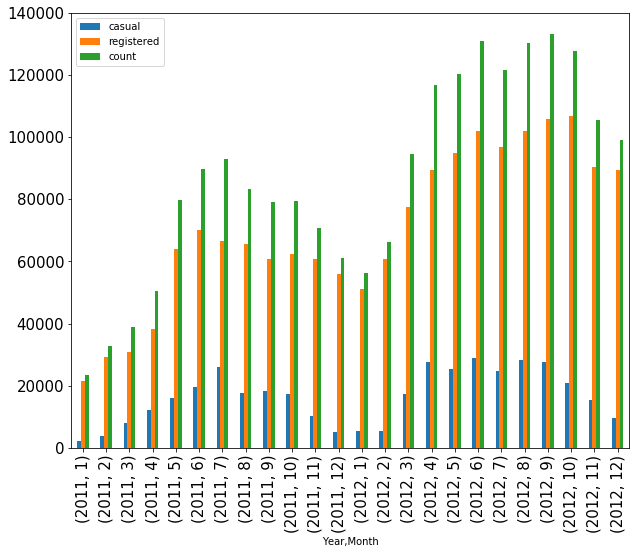

In [34]:
# 月份
# 1，使用量随月份的变化
# 结论：每月注册/非注册用户和总体都呈现一致的分布，每年在5月-10月范围迎来峰值，冬季12月-2月左右处于低谷
df.groupby(by=['Year','Month']).sum().loc[:,['casual','registered','count']].sort_index().plot(kind='bar',figsize=(10,8),fontsize=15)


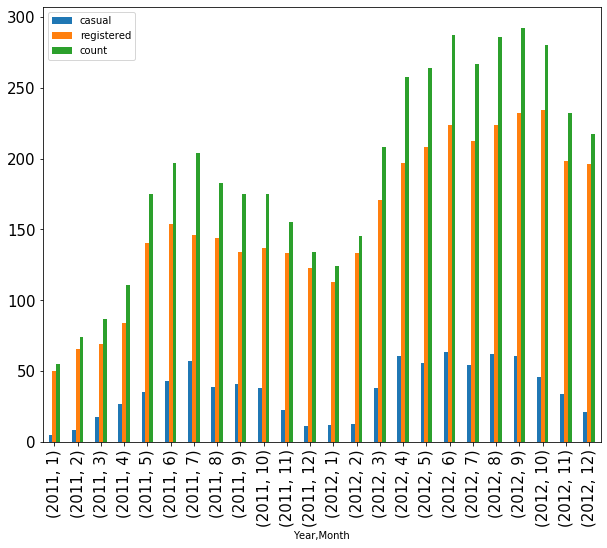

In [83]:
# 看看每月平均效果，跟上面差不多
df.groupby(by=['Year','Month']).mean().loc[:,['casual','registered','count']].sort_index().plot(kind='bar',figsize=(10,8),fontsize=15)

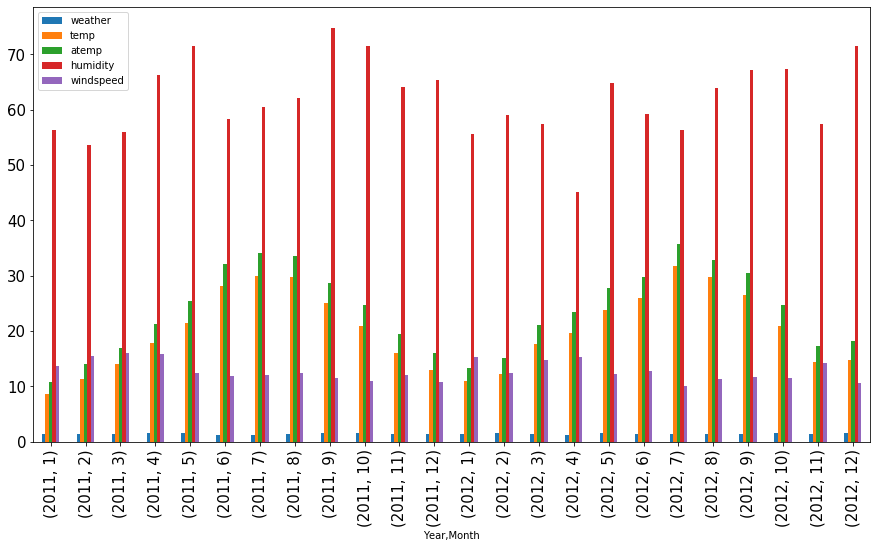

In [36]:
# 2，天气随月份的变化
# 结论：平均而言，晴朗与雨雪方面每月基本相同，其他都规律变化
df.groupby(by=['Year','Month']).mean().loc[:,['temp','atemp','humidity','windspeed']].sort_index().plot(kind='bar',figsize=(15,8),fontsize=15)

### 4种天气随月份的变化

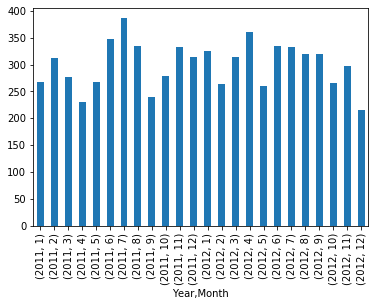

In [77]:
# 晴天
df[df['weather']==1].groupby(by=['Year','Month']).count().loc[:,'season'].plot(kind='bar')

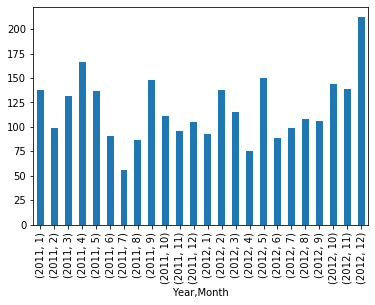

In [78]:
# 阴天
df[df['weather']==2].groupby(by=['Year','Month']).count().loc[:,'season'].plot(kind='bar')

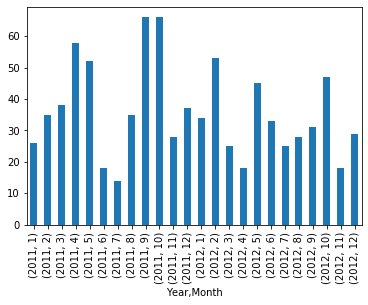

In [79]:
# 小雨雪
df[df['weather']==3].groupby(by=['Year','Month']).count().loc[:,'season'].plot(kind='bar')

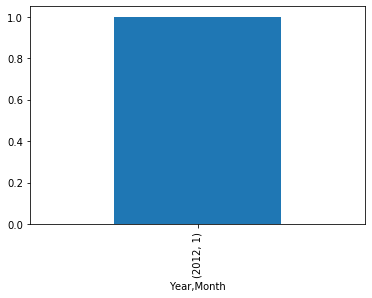

In [80]:
# 大雨雪，只有1条？这个感觉有问题，2年间大雨肯定不止这些
df[df['weather']==4].groupby(by=['Year','Month']).count().loc[:,'season'].plot(kind='bar')

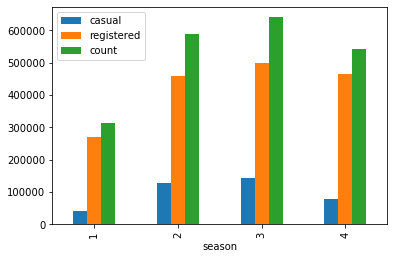

In [85]:
# 季节
# 跟上面结论一致：夏秋2季较好
df.groupby('season').sum().loc[:,['casual','registered','count']].plot(kind='bar')

In [86]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,Month,Year,time_period
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,1,2011,1
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1,2011,1
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,1,2011,1
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,1,2011,1
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,1,2011,1


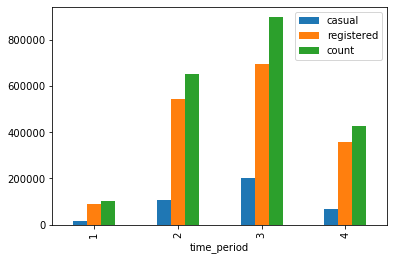

In [89]:
# 时段
# 显然，凌晨和深夜使用较少，下午使用较多（以上班计，上午只需去上班，下午吃饭+回公司）
df.groupby('time_period').sum().loc[:,['casual','registered','count']].plot(kind='bar')

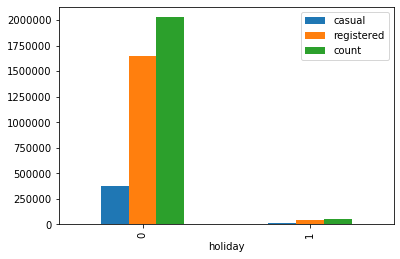

In [90]:
# 节假日
# 总体肯定工作日多
df.groupby('holiday').sum().loc[:,['casual','registered','count']].plot(kind='bar')

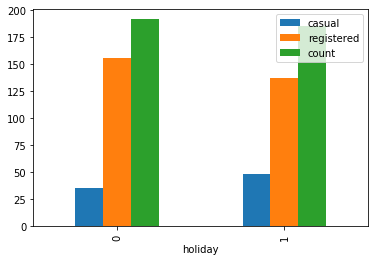

In [92]:
# 平均来说，节假日非注册用户增多，而注册用户减少，可在此时进行用户推广
# 本以为节假日使用会增多，也许这时候更多的使用公共交通吧
df.groupby('holiday').mean().loc[:,['casual','registered','count']].plot(kind='bar')

### 天气相关

In [93]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,Month,Year,time_period
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,1,2011,1
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1,2011,1
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,1,2011,1
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,1,2011,1
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,1,2011,1


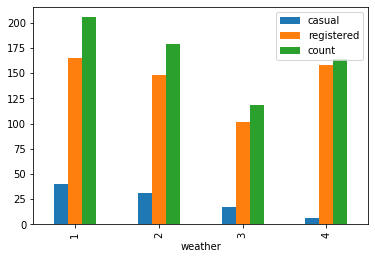

In [94]:
# 第4列前面知道只有一个数据，不可靠
# 基本符合常理，下雨时使用减少
df.groupby('weather').mean().loc[:,['casual','registered','count']].plot(kind='bar')

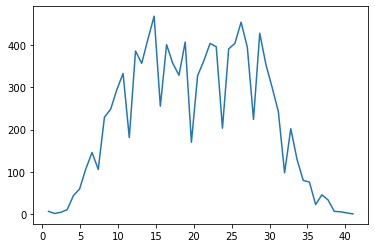

In [100]:
# 温度
# 先看看温度的分布情况，再划分区间，方便可视化展示
df.temp.value_counts().sort_index().plot()

In [6]:
# 分区
df['temp_bin']=pd.cut(df.temp,bins=[-1,9,27,35,50],right=True,labels=['cold','warm','hot','superHot'])

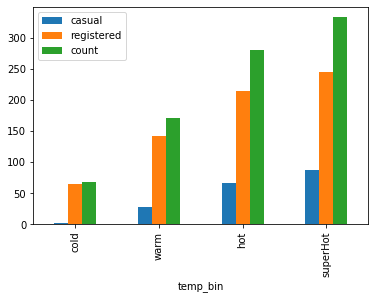

In [102]:
# 虽然用户在夏秋2季使用最多，但是居然在高温天气使用也最多，有点反常
df.groupby('temp_bin').mean().loc[:,['casual','registered','count']].plot(kind='bar')

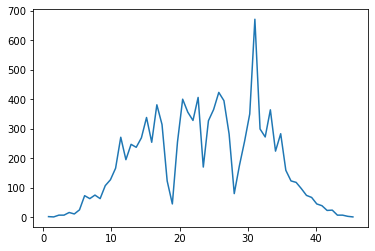

In [103]:
# 体感温度
df.atemp.value_counts().sort_index().plot()

In [104]:
df['atemp_bin']=pd.cut(df.atemp,bins=[-1,9,27,35,50],right=True,labels=['cold','warm','hot','superHot'])

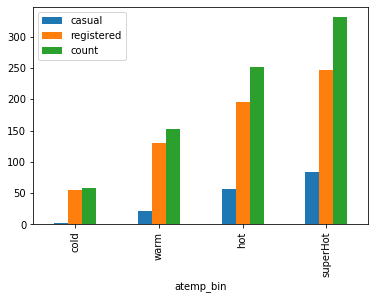

In [105]:
# 正常，体感温度与环境温度是高度相关的
df.groupby('atemp_bin').mean().loc[:,['casual','registered','count']].plot(kind='bar')

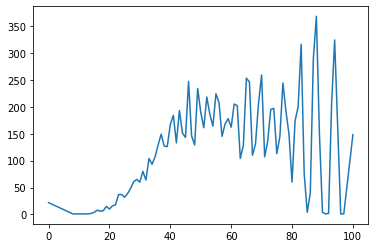

In [106]:
# 湿度
df.humidity.value_counts().sort_index().plot()

In [108]:
df['humidity_bin']=pd.cut(df.humidity,bins=[-1,30,80,100],right=True,labels=['dry','suitable','wet'])

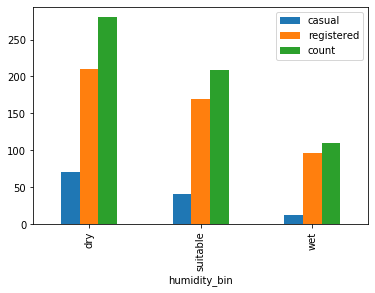

In [109]:
# 还是有点反常，不过结合前面人们更喜欢在中午和下午时间使用，这就可以解释干燥时候使用更多
df.groupby('humidity_bin').mean().loc[:,['casual','registered','count']].plot(kind='bar')

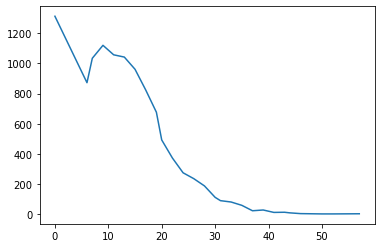

In [110]:
# 风速
df.windspeed.value_counts().sort_index().plot()

In [112]:
# 0-2级，3-5级，6-7级
df['wind_bin']=pd.cut(df.windspeed,bins=[-1,11,38,61],right=True,labels=['noWind','breeze','gale'])

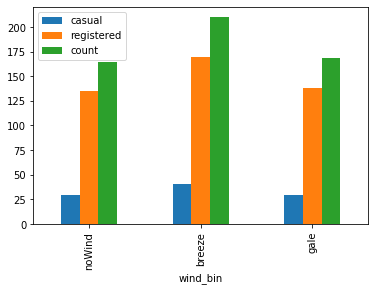

In [113]:
# 中等风力使用人最多，正常
# 大风时也挺多人用的。。
df.groupby('wind_bin').mean().loc[:,['casual','registered','count']].plot(kind='bar')

### 特征筛选与建模预测

In [114]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,Month,Year,time_period,temp_bin,atemp_bin,humidity_bin,wind_bin
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,1,2011,1,warm,warm,wet,noWind
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1,2011,1,warm,warm,suitable,noWind
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,1,2011,1,warm,warm,suitable,noWind
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,1,2011,1,warm,warm,suitable,noWind
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,1,2011,1,warm,warm,suitable,noWind


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  object        
 1   season        10886 non-null  int64         
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  int64         
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  count         10886 non-null  int64         
 12  time          10886 non-null  datetime64[ns]
 13  Month         10886 non-null  int64         
 14  Year          10886 non-null  int64         
 15  time_period   10886 non-null  int64 

In [117]:
data=pd.get_dummies(df,columns=['temp_bin','humidity_bin','wind_bin'])

In [123]:
# 这里特征选择时，并不需要划分区间后的特征，各天气状态特征已经是数值型的了
need_features=['season','holiday','weather','time_period','temp_bin_cold','temp_bin_warm', 'temp_bin_hot', 'temp_bin_superHot',
              'humidity_bin_dry', 'humidity_bin_suitable', 'humidity_bin_wet',
              'wind_bin_noWind', 'wind_bin_breeze', 'wind_bin_gale']
predict_features=['casual','registered','count']
corr_features=['count','season','holiday','weather','time_period','temp_bin_cold','temp_bin_warm', 'temp_bin_hot', 'temp_bin_superHot',
              'humidity_bin_dry', 'humidity_bin_suitable', 'humidity_bin_wet',
              'wind_bin_noWind', 'wind_bin_breeze', 'wind_bin_gale']

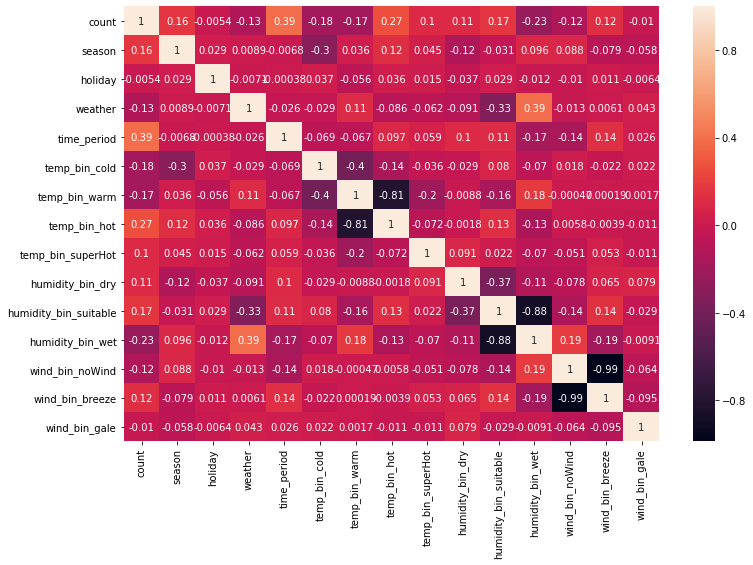

In [129]:
# 仅展示此特征选择下的相关系数矩阵热图
plt.figure(figsize=(12,8))
sns.heatmap(data[corr_features].corr(),annot=True)

#### 特征选择

In [7]:
features=['season','holiday','weather','time_period','temp','humidity','windspeed']
show_features=['count','season','holiday','weather','time_period','temp','humidity','windspeed']
X=df[features].values
y=df['count'].values

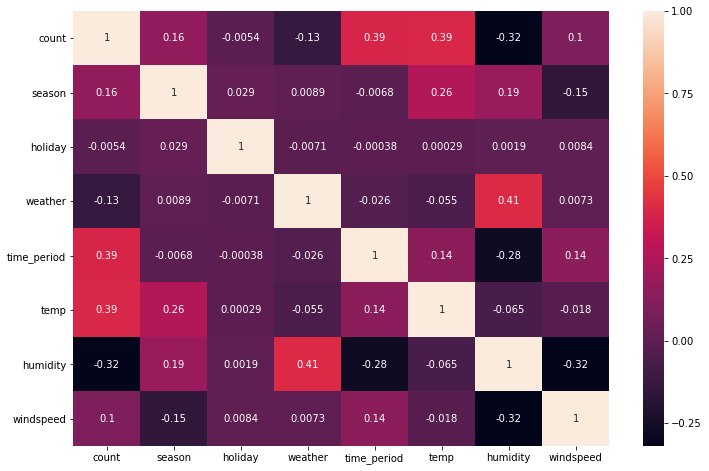

In [131]:
# 热图
plt.figure(figsize=(12,8))
sns.heatmap(df[show_features].corr(),annot=True)

In [8]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rfr=RandomForestRegressor()
params={'n_estimators':range(100,501,100),'min_samples_split':range(2,11,2)}
gs_model=GridSearchCV(rfr,param_grid=params,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1)
gs_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': range(2, 11,

In [144]:
gs_model.best_params_

{'min_samples_split': 10, 'n_estimators': 300}

In [146]:
model=RandomForestRegressor(min_samples_split=10,n_estimators=300)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [147]:
from sklearn.metrics import mean_absolute_error
# 84.72193267010398
mean_absolute_error(y_pred,y_test)

84.72193267010398

In [149]:
y_test.max(),y_test.min(),y_test.mean(),y_test.std()

(948, 1, 194.6338028169014, 186.58935301608648)

In [24]:
# 计算平均绝对百分误差
def cal_error(real,predict):
    return (abs(real-predict)/real).mean()

In [151]:
# 偏离太大，从预测讲不好
cal_error(y_test,y_pred)

1.3925223611019084

### 再使用XGBRegressor单步调优试试

In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve
import numpy as np

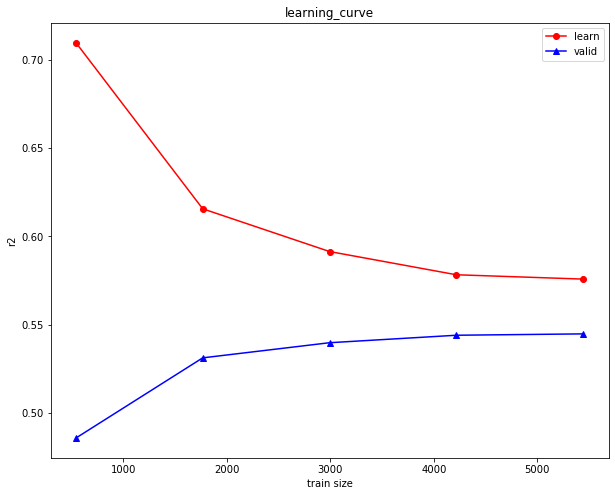

[0.48579733 0.53118966 0.53975958 0.54399242 0.54476301]


In [190]:

X=df[['season','holiday','weather','time_period','temp','humidity','windspeed']].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,test_size=0.25)
model_1=XGBRegressor()
# 使用r2，可以避免量纲不同的影响，公式为r2=1-MSE(y_pred,y_test)/np.var(y_test)
# 衡量特征对因变量的解释程度
train_sizes, train_scores, valid_scores =learning_curve(model_1,X_train,y_train,cv=3,scoring='r2',n_jobs=-1,random_state=43,shuffle=True)

# 2个曲线收敛到较小值，特征对因变量的解释性较差
plt.figure(figsize=(10,8))
plt.plot(train_sizes,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(train_sizes,valid_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('learning_curve')
plt.legend()
plt.show()
print(valid_scores.mean(axis=1))

### 特征优化
#### month比season更详细一点，atemp比temp更能反映人的感觉，重新选择下特征

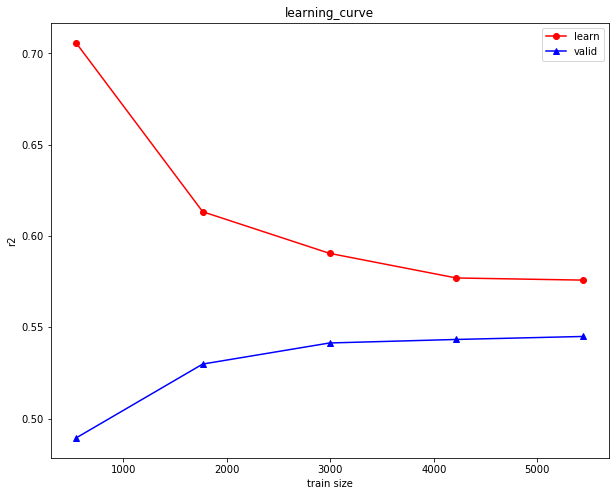

[0.48931794 0.52981467 0.541366   0.54329033 0.54493442]


In [194]:
# 微小的优化
X=df[['Month','holiday','weather','atemp','humidity','windspeed','time_period']].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,test_size=0.25)

model_2=XGBRegressor()
train_sizes, train_scores, valid_scores =learning_curve(model_2,X_train,y_train,cv=3,scoring='r2',n_jobs=-1,random_state=43,shuffle=True)

plt.figure(figsize=(10,8))
plt.plot(train_sizes,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(train_sizes,valid_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('learning_curve')
plt.legend()
plt.show()
print(valid_scores.mean(axis=1))

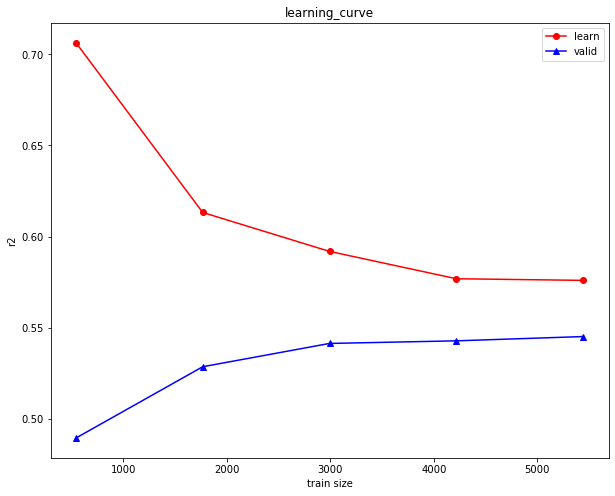

[0.48954446 0.52864365 0.54141939 0.54285018 0.54519693]


In [10]:
# 去除holiday特征，因为平均效果与它关系不大
# 跟上面差不多，说明这特征确实没啥用，有几个验证得分还略微大一点
X=df[['Month','weather','atemp','humidity','windspeed','time_period']].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,test_size=0.25)

model_3=XGBRegressor()
train_sizes, train_scores, valid_scores =learning_curve(model_3,X_train,y_train,cv=3,scoring='r2',n_jobs=-1,random_state=43,shuffle=True)

plt.figure(figsize=(10,8))
plt.plot(train_sizes,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(train_sizes,valid_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('learning_curve')
plt.legend()
plt.show()
print(valid_scores.mean(axis=1))

In [ ]:
# 看看最后特征选择的模型
model_3.fit(X_train,y_train)
y_pred=model_3.predict(X_test)
# 0.5472150310291743
1-mean_squared_error(y_test,y_pred)/np.var(y_test)

#### 进入单项调优

In [11]:
from sklearn.model_selection import validation_curve

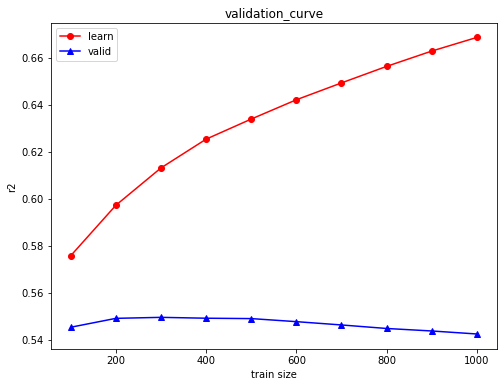

[0.54534526 0.54912123 0.54954523 0.54917395 0.54901518 0.54771299
 0.54630835 0.54481083 0.54374918 0.54246908]


In [199]:
# n_estimators最佳：300
param_range=range(100,1001,100)
train_scores, test_scores=validation_curve(XGBRegressor(),X_train,y_train,'n_estimators',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

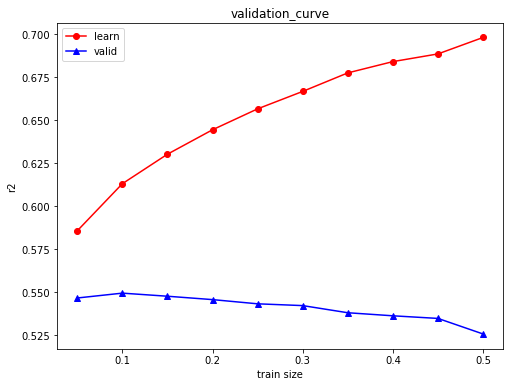

[0.54672322 0.54954523 0.5477496  0.54578392 0.54333891 0.54230018
 0.53814687 0.53637122 0.53484685 0.52580499]


In [201]:
# learning_rate最佳：0.1
param_range=np.arange(0.05,0.51,0.05)
train_scores, test_scores=validation_curve(XGBRegressor(n_estimators=300),X_train,y_train,'learning_rate',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

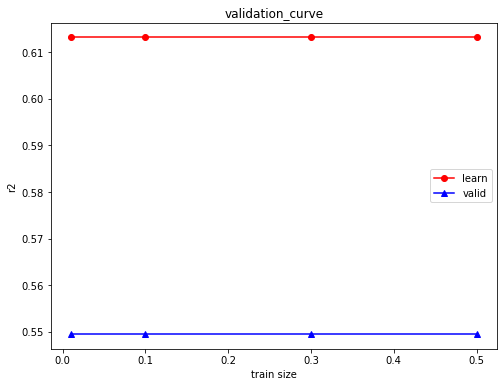

[0.54954523 0.54954523 0.54954523 0.54954523]


In [202]:
# gamma：无影响
param_range=[0.01,0.1,0.3,0.5]
train_scores, test_scores=validation_curve(XGBRegressor(n_estimators=300),X_train,y_train,'gamma',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

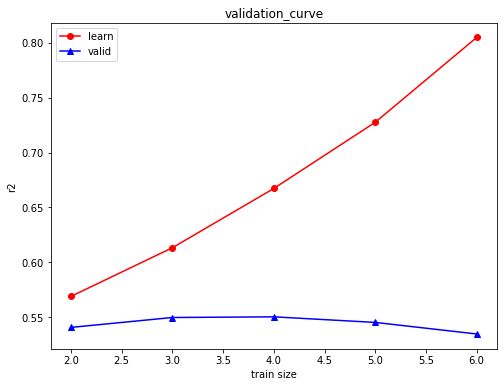

[0.5405022  0.54954523 0.5501536  0.54506385 0.53452312]


In [203]:
# max_depth:4
param_range=range(2,7)
train_scores, test_scores=validation_curve(XGBRegressor(n_estimators=300),X_train,y_train,'max_depth',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

In [23]:
model_xgbRe=XGBRegressor(n_estimators=300,max_depth=4)
model_xgbRe.fit(X_train,y_train)
y_pred=model_xgbRe.predict(X_test)

[17:25:06] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
from sklearn.metrics import mean_squared_error

In [207]:
# r2得分：0.55932231338672，优化后略微提升，得分比验证还高一些
1-mean_squared_error(y_test,y_pred)/np.var(y_test)

0.55932231338672

In [25]:
# 差不多，稍微变大了一点点
cal_error(y_test,y_pred)

1.4069590769368754

#### 试试svr

In [13]:
from sklearn.svm import SVR

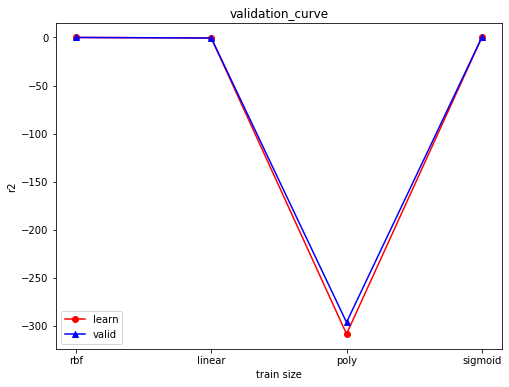

[ 1.70263527e-03 -5.44337009e-01 -2.96265018e+02 -2.14354166e-03]


In [16]:
# 参数调节：gamma,degree,kernel,max_iter
# kernel：除poly表现较差，其他3个差不多，取rbf。这些r2取值都很小，说明SVR可能并不适合这个场景
# max_iter无限制，似乎非常影响运行时间
param_range=['rbf','linear','poly','sigmoid']
train_scores, test_scores=validation_curve(SVR(max_iter=1000),X_train,y_train,'kernel',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

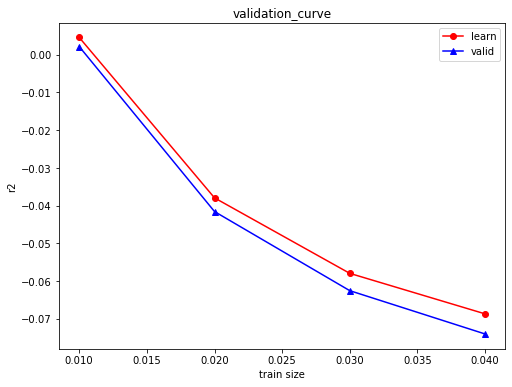

[ 0.00217009 -0.04155689 -0.06252938 -0.07400624]


In [20]:
# kernel默认rbf
# gamma：0.01
param_range=[0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.8,1]
train_scores, test_scores=validation_curve(SVR(max_iter=2000),X_train,y_train,'gamma',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

In [21]:
model_4=SVR(gamma=0.01,max_iter=5000)
model_4.fit(X_train,y_train)
y_pred=model_4.predict(X_test)
# 0.17，这分数太低了
1-mean_squared_error(y_test,y_pred)/np.var(y_test)

0.1706186350533455

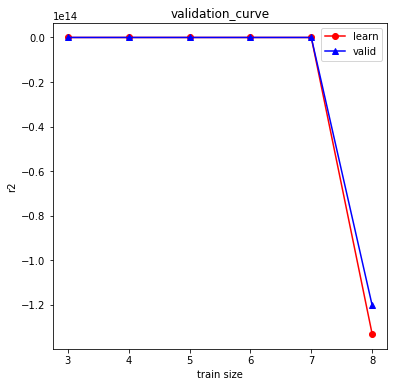

[-2.36734293e+02 -1.61369411e+02 -1.48471293e+03 -2.42795264e+04
 -2.53651477e+08 -1.20254059e+14]


In [22]:
# 试试poly吧，好像也不行，放弃SVR了
param_range=range(3,9)
train_scores, test_scores=validation_curve(SVR(kernel='poly',max_iter=2000),X_train,y_train,'degree',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(6,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))